<a href="https://colab.research.google.com/github/veto4ka24/6_sem/blob/main/%D0%92%D1%8B%D1%87%D0%BC%D0%B0%D1%82%D1%8B_%D0%96%D0%B1%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0_1%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Функции для решения задач 3.4 и 8.4**

(Код взят из решения Светланы Кузнецовой гр.Б06-905 https://github.com/SvetlanaKuznetsova/Computational_Math_6sem/tree/main/HW1)



In [2]:
import numpy as np
import numpy.linalg as ln
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import scipy.optimize
from scipy.optimize import newton_krylov
import math

In [3]:
CAUCHY = [1, 0, 0]


def func(y, param):
    A = 0.04
    B = 10**(4)
    C = 3 * 10**(7)
    return([-A*y[0] + B*y[1]*y[2], A*y[0] - B*y[1]*y[2] - C*(y[1])**2, C*(y[1])**2])


def RK2(start, stop, step, Cauchy, a, func):
    time = [0]
    solution = [np.array(Cauchy)]
    
    while time[-1] < stop:
        k1 = scipy.optimize.root((lambda k: func(solution[-1] + step * (2 + np.sqrt(2))/2 * k, a) - k), np.array(func(solution[-1],a))).x
        k2 = scipy.optimize.root((lambda k: func(solution[-1] + step * (-np.sqrt(2) * k1 + (2 + np.sqrt(2)/2) * k),a) - k),np.array(func(solution[-1],a))).x
        time.append(time[-1] + step)
        solution.append(solution[-1] + step/2 * (k1 + k2))
        
    return(time, solution)

def RK3(start, stop, step, Cauchy, a, func):
    time = [0]
    solution = [np.array(Cauchy)]
    
    while time[-1] < stop:
        k1 = scipy.optimize.root((lambda k: func(solution[-1] + step * (3 + np.sqrt(3))/6 * k, a) - k), func(solution[-1],a)).x
        k2 = scipy.optimize.root((lambda k: func(solution[-1] + step * ((- 2*np.sqrt(3))/6 * k1 + (3 + np.sqrt(3)/6) * k), a) - k),
                           func(solution[-1],a)).x
        time.append(time[-1] + step)
        solution.append(solution[-1] + step/2 * (k1 + k2))
    return(time, solution)

def FDN2(start, stop, step, Cauchy, a,func):
    time, solution = RK3(start, start + step, step, Cauchy, a, func)
    while time[-1] < stop:
        time.append(time[-1] + step)
        new_y = scipy.optimize.root(lambda y: step * np.array(func(y,a)) - 3/2 * y + 2* solution[-1] - 1/2 * solution[-2], solution[-1]).x
        solution.append(new_y)
    return(time, solution)

def FDN3(start, stop, step, Cauchy, a,func):
    time, solution = RK3(start, start + 2 * step, step, Cauchy, a, func)
    while time[-1] < stop:
        time.append(time[-1] + step)
        new_y = scipy.optimize.root(lambda y: (step * np.array(func(y,a))) - 11/6 * y + 3 * solution[-1] - 3/2 * solution[-2] + 1/3 * solution[-3], solution[-1]).x
        solution.append(new_y)
    return(time, solution)

def FDN4(start, stop, step, Cauchy, a, func):
    time, solution = RK3(start, start + 3 * step, step, Cauchy, a, func)
    while time[-1] < stop:
        time.append(time[-1] + step)
        new_y = scipy.optimize.root(lambda y: (step * np.array(func(y,a))) - 25/12 * y + 4 * solution[-1] - 3 * solution[-2] + 4/3 * solution[-3] - 1/4 * solution[-4], solution[-1]).x
        solution.append(new_y)
    return(time, solution)


def make_plots(method, stop, step):
    time, solution = method(0, stop, step, CAUCHY, True, func)
    solution = np.array(solution).T

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    for i in range(2):
        for j in range(2):
          if i == 1:
            axs[i][j].plot(time, solution[2])
            axs[i][j].set_xlabel('$t$')
            axs[i][j].set_ylabel(f'$y_{3}$')
            break
          else:
            axs[i][j].plot(time, solution[2*i + j])
            axs[i][j].set_xlabel('$t$')
            axs[i][j].set_ylabel(f'$y_{2*i + j + 1}$')
            
            
def make_plots_nevyazka(methods_dict, stop, step):
    time, solution_FDN4 = methods_dict['FDN4'](0, stop, step, CAUCHY, True, func)
    for key, val in methods_dict.items():
        if key == 'FDN4':
            continue
        time, solution = val(0, stop, step, CAUCHY, True, func)
        t, n = [], [] 
        for i in range(stop):
            t.append(i * step)
            n.append(abs(solution[i][0] - solution_FDN4[i][0]))
        
        plt.plot(t, n, label = key)
        plt.xlabel("t")
        plt.ylabel("|r|")
        plt.legend()
    
    plt.show()

**Задача 8.4**

Модель реакций Робертсона представима в виде системы из трех ОДУ:

$$\dot{y_1} = -0.04 y_1 + 10^4 y_2 y_3$$
$$\dot{y_2} = 0.04 y_1 - 10^4 y_2 y_3 - 3 \cdot 10^7 y_2 ^2$$
$$\dot{y_3} = 3 \cdot 10^7 y_2 ^2$$

Начальные условия системы: $y_1 (0) = 1, y_2 (0) = y_3 (0) = 0$.

Сама рабоота Робертсона содержала рассмотрение на отрезке интегрирования $T_k = 20$, моя задача -- рассмотреть помимо этого отрезка также $T_k = 100, 1000, ..., 10^{11}$

Для численного интегрирования используются ФДН-методы:

$$k = 2: \dfrac{3}{2} y_{n + 1} - 2 y_n + \dfrac{1}{2} y_{n - 1} = h f_{n + 1},$$
$$k = 3: \dfrac{11}{6} y_{n + 1} - 3 y_n + \dfrac{3}{2} y_{n - 1} - \dfrac{1}{3} y_{n - 2} = h f_{n + 1},$$
$$k = 4: \dfrac{25}{12} y_{n + 1} - 4 y_n + 3 y_{n - 1} - \dfrac{4}{3} y_{n - 2} + \dfrac{1}{4} y_{n - 3} = h f_{n + 1}$$

Значения в недостающих точках определяются с помощью таблиц Рунге-Кутты.

Таблица 1:

$$\dfrac{2 + \sqrt{2}}{2}   |   \dfrac{2 + \sqrt{2}}{2}  |  0$$
_________________________________________________________________
$$\dfrac{2 - \sqrt{2}}{2}  |  - \sqrt{2}  |  \dfrac{2 + \sqrt{2}}{2} $$
______________________________________________________________________
$$| \dfrac{1}{2} | \dfrac{1}{2}$$

Таблица 2:

$$\dfrac{3 + \sqrt{3}}{6}   |   \dfrac{3 + \sqrt{3}}{6}  |  0$$
_________________________________________________________________
$$\dfrac{3 - \sqrt{3}}{6}  |  \dfrac{- 2 \sqrt{3}}{6}  | \dfrac{3 + \sqrt{3}}{6} $$
______________________________________________________________________
$$| \dfrac{1}{2} | \dfrac{1}{2}$$





Построим графики всех решений методами Рунге-Кутты (сначала 2, потом 3 порядка аппроксимации) и ФДН (2, 3 и 4 порядков аппроксимации). С помощью фукнции scipy.optimize (методом Ньютона) находим величины, поскольку они заданы неявно. Шаг во всех методах равен $h = 0.1$.

**Метод Рунге-Кутты 2 порядка**

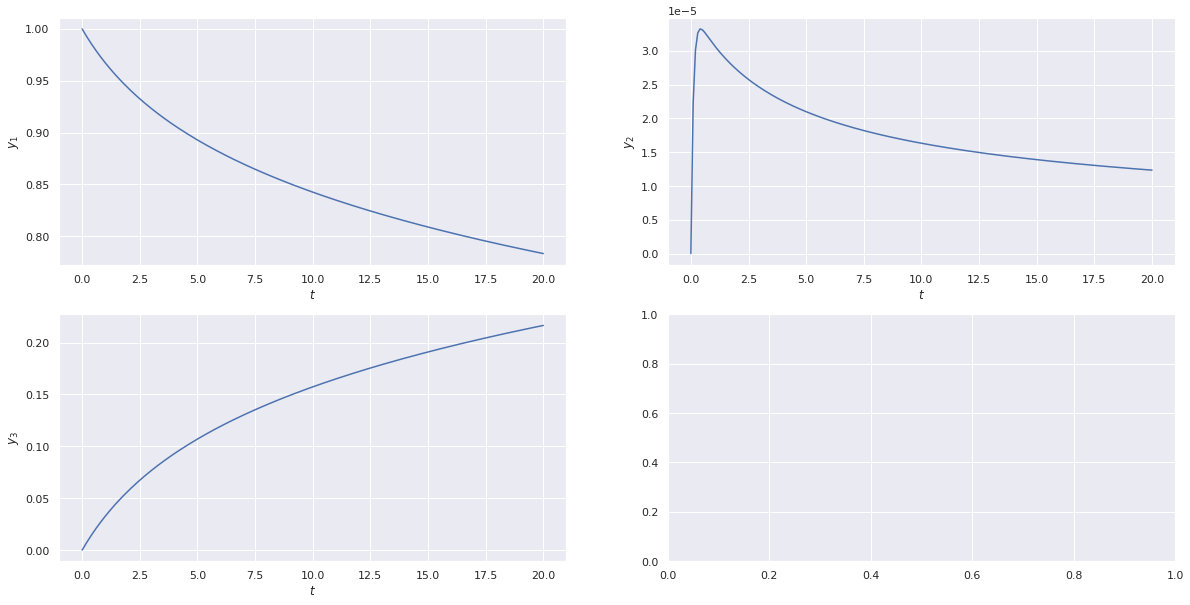

In [ ]:
make_plots(RK2, 20, 0.1)

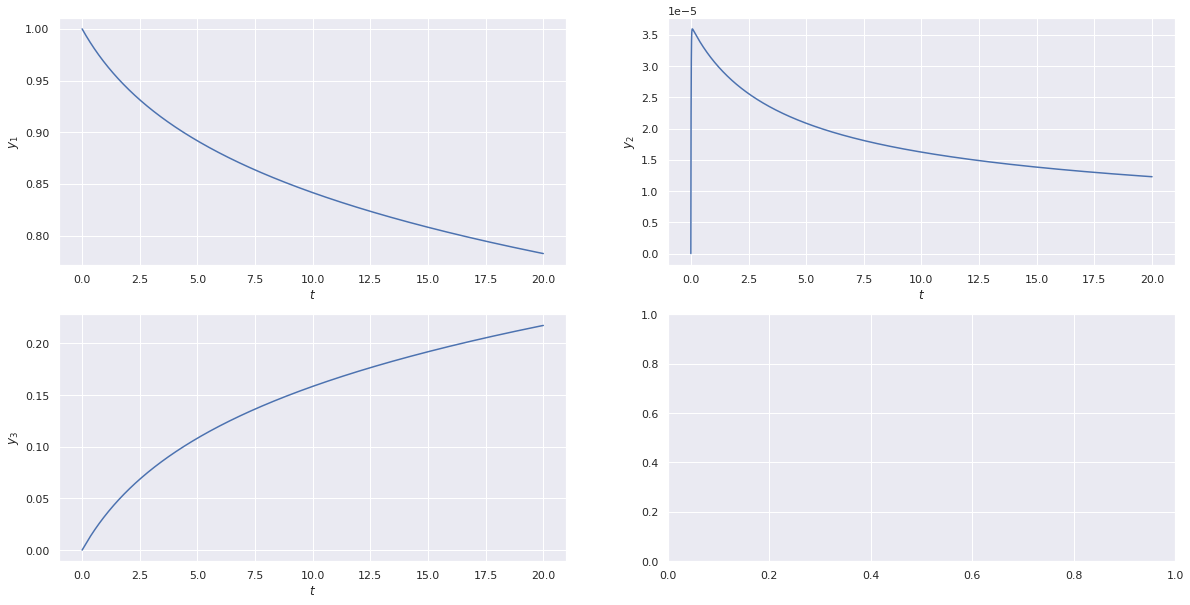

In [ ]:
make_plots(RK2, 20, 0.01)

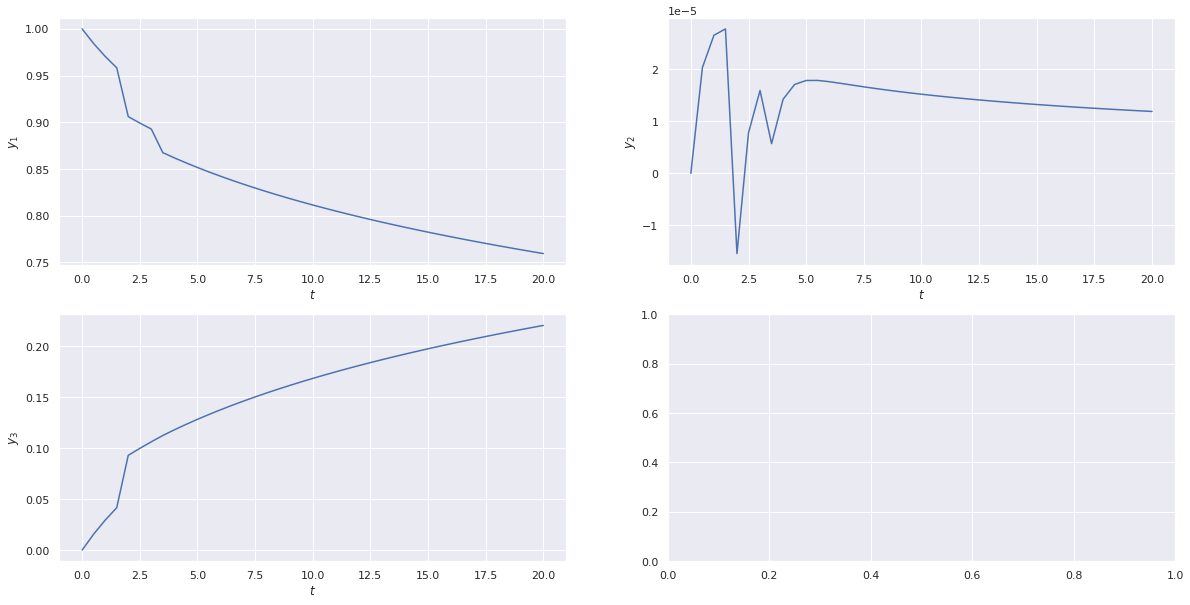

In [ ]:
make_plots(RK2, 20, 0.5)

Шаги на графиках выше: $h_1 = 0.1$, $h_2 = 0.01$, $h_3 = 0.5$. Видим, что увеличение шага ведет к появлению ломаных участков и непонятных осцилляций у решения $y_2$, которых нет при меньшем шаге. Повторим эксперимент на данном отрезке с другими методами.

**Метод Рунге-Кутты 3 порядка**

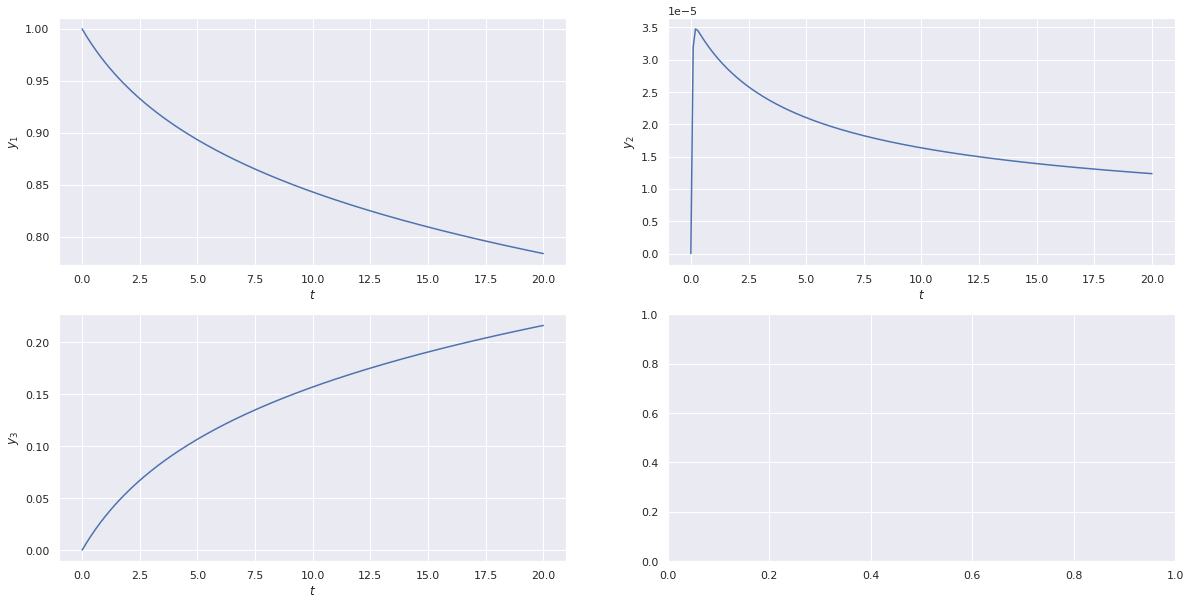

In [ ]:
make_plots(RK3, 20, 0.1)

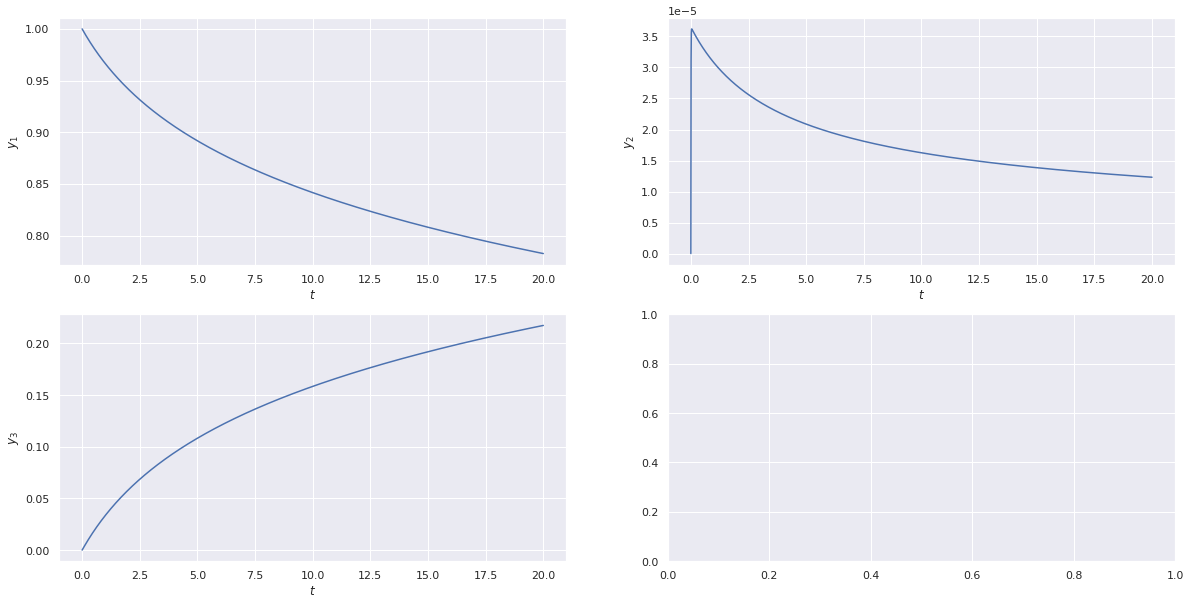

In [ ]:
make_plots(RK3, 20, 0.01)

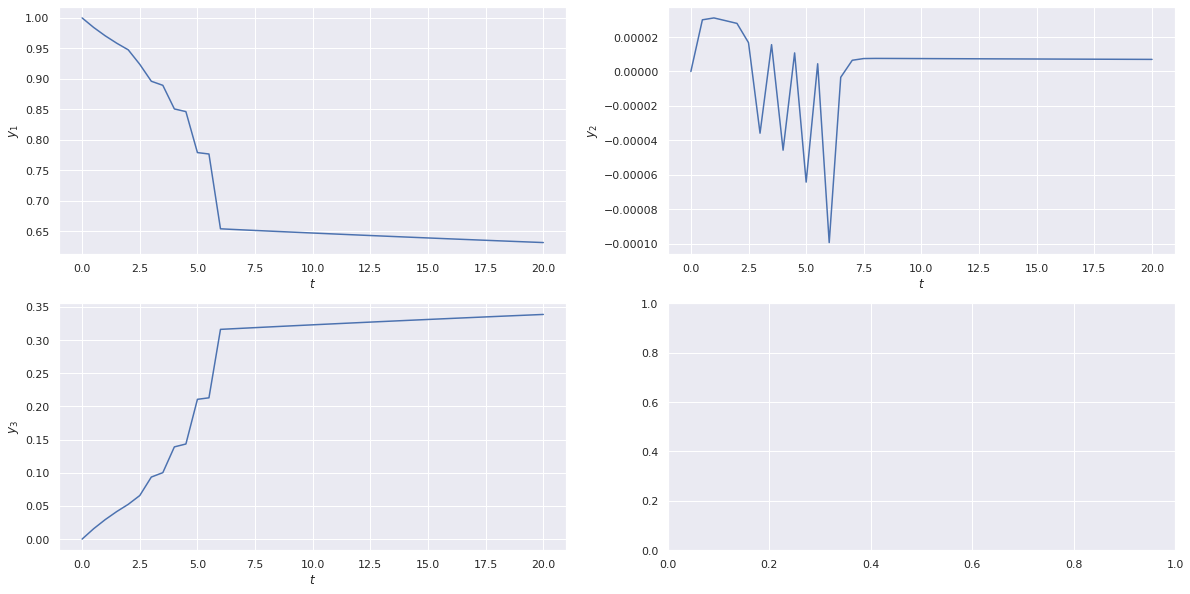

In [ ]:
make_plots(RK3, 20, 0.5)

При $h_3 = 0.5$ осцилляций у решения $y_2$ появилось еще больше.

**Метод ФДН 2 порядка**

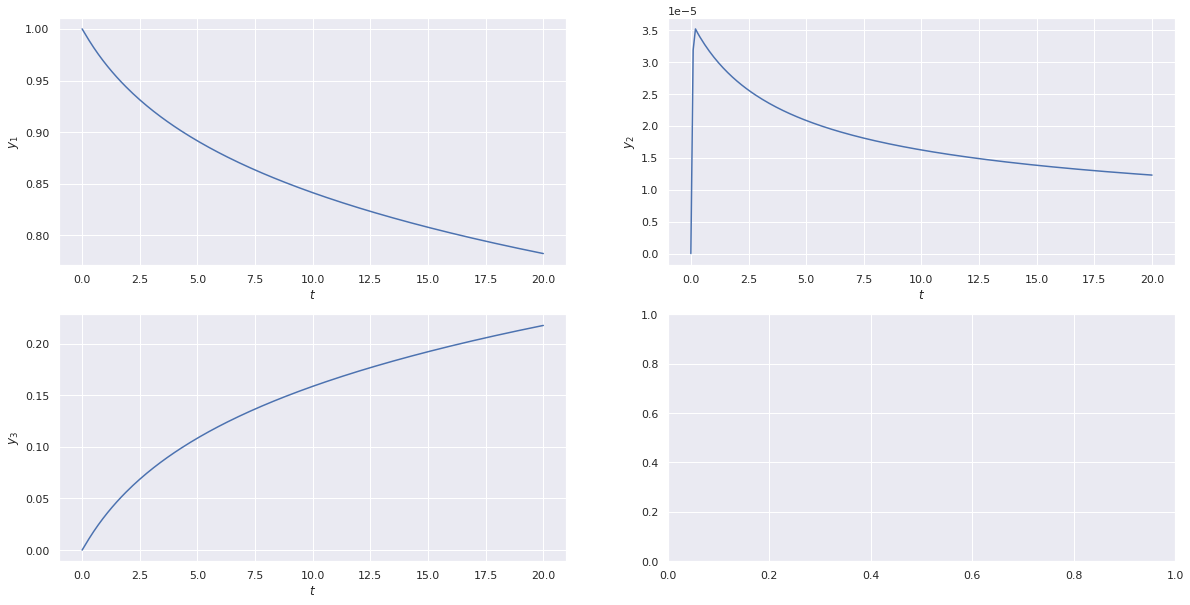

In [ ]:
make_plots(FDN2, 20, 0.1)

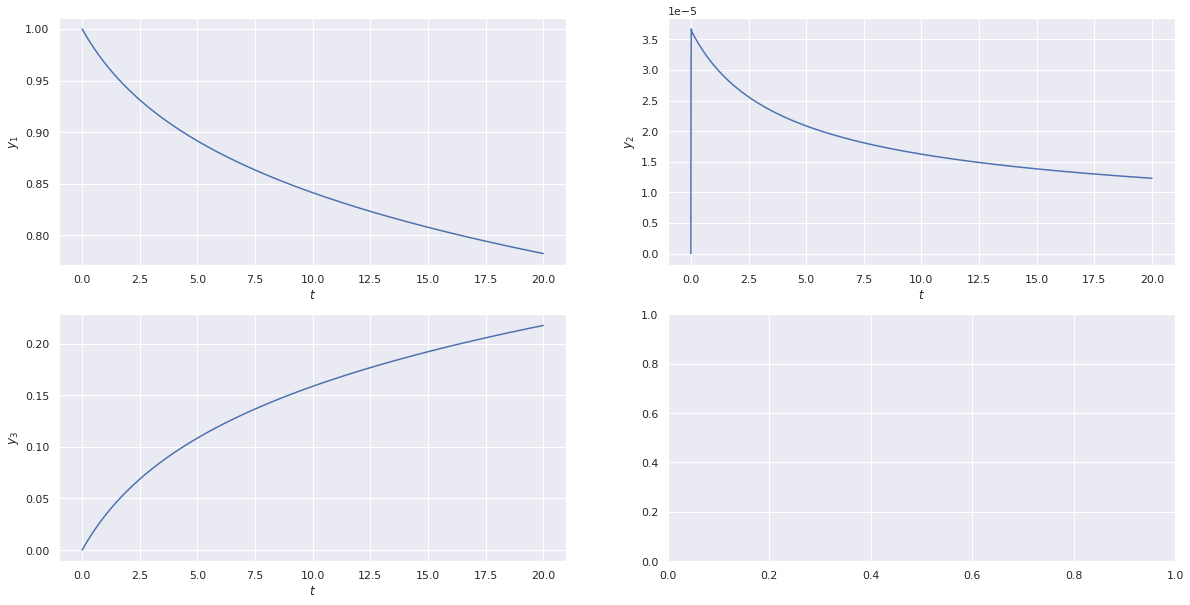

In [ ]:
make_plots(FDN2, 20, 0.01)

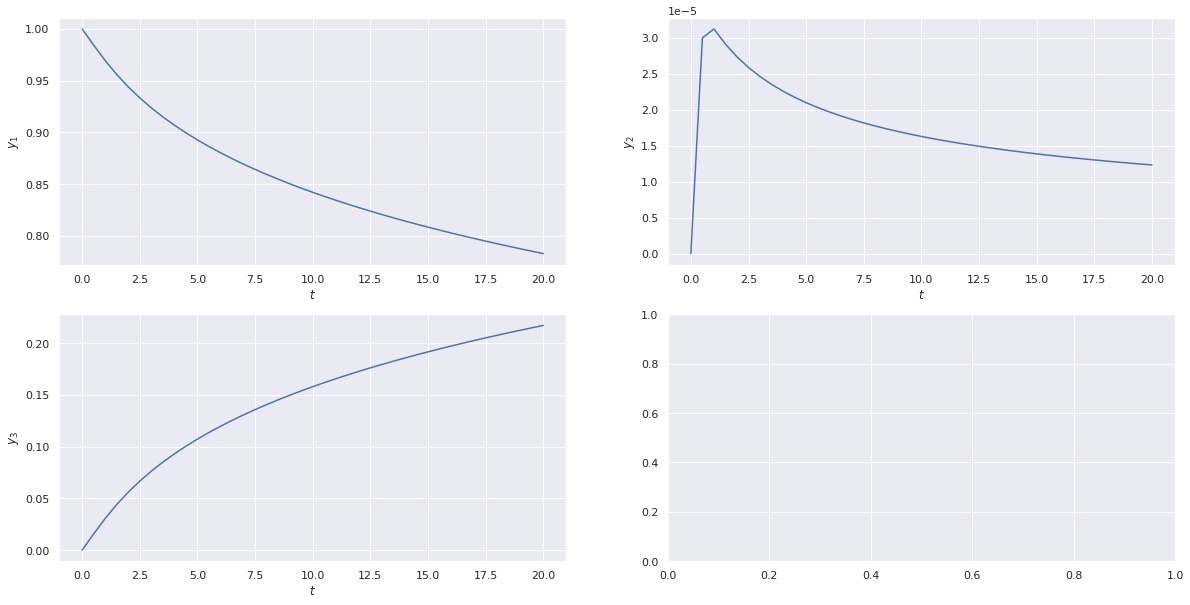

In [ ]:
make_plots(FDN2, 20, 0.5)

В отличие от методов Рунге-Кутты, метод ФДН 2 порядка не показал сильных (да и вообще никаких) осцилляций у решения $y_2$ при увеличении шага до $h_3 = 0.5$.

**Метод ФДН 3 порядка**

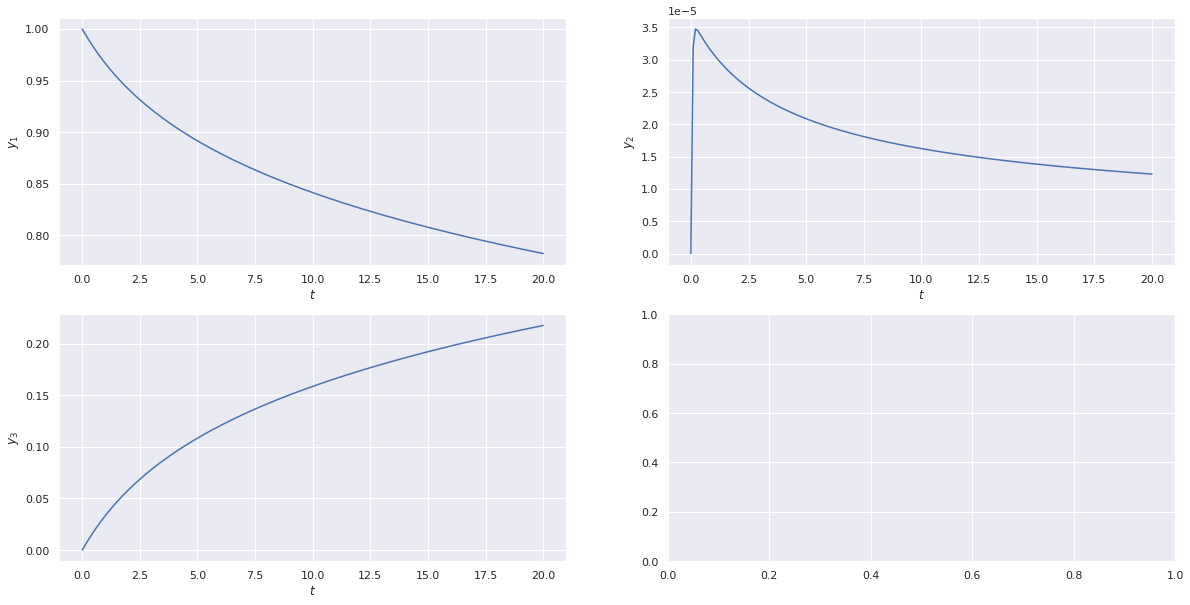

In [ ]:
make_plots(FDN3, 20, 0.1)

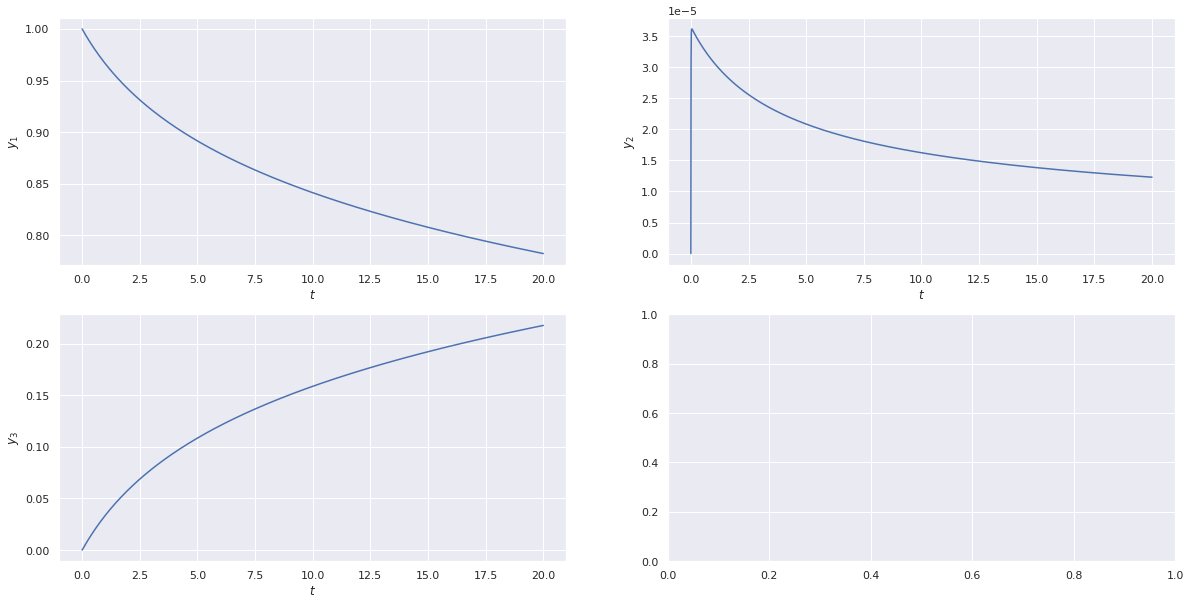

In [ ]:
make_plots(FDN3, 20, 0.01)

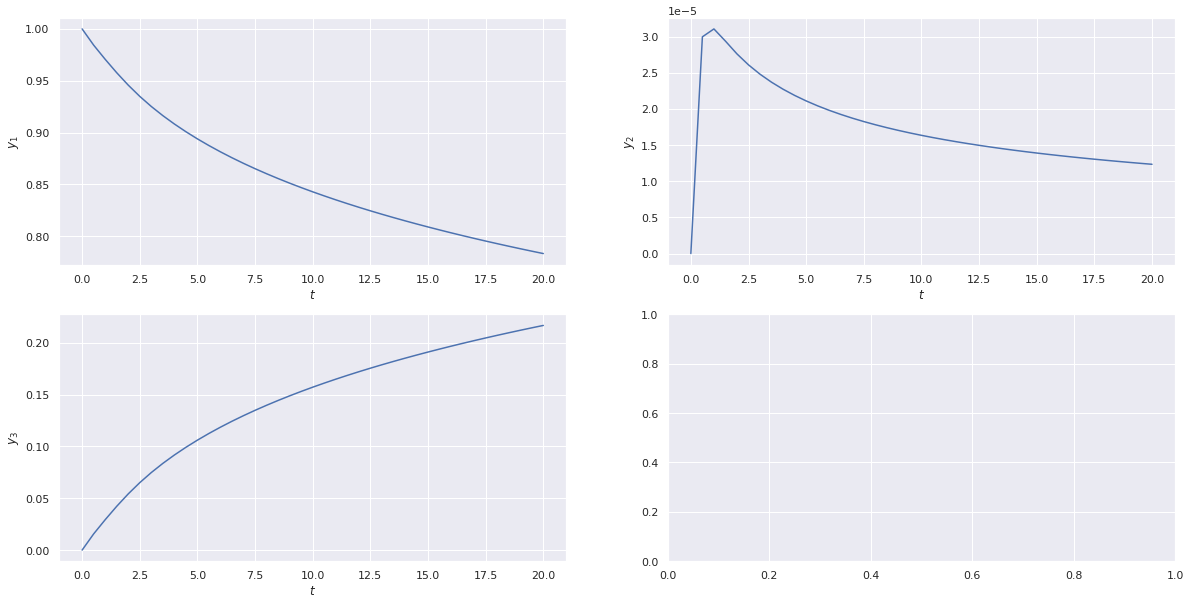

In [ ]:
make_plots(FDN3, 20, 0.5)

**Метод ФДН 4 порядка**

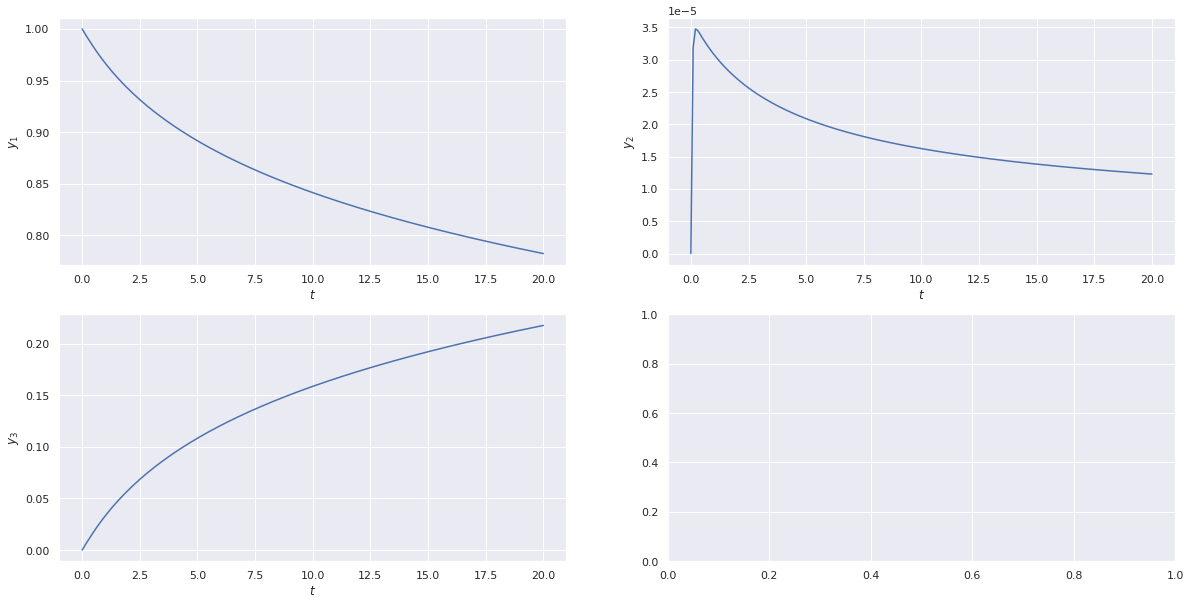

In [ ]:
make_plots(FDN4, 20, 0.1)

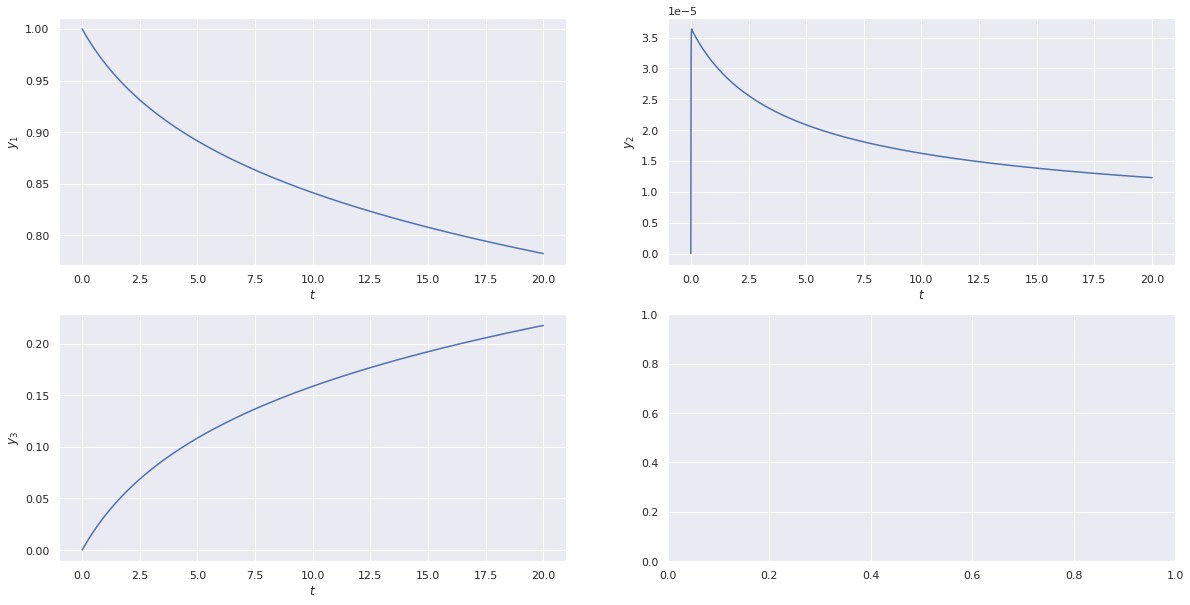

In [ ]:
make_plots(FDN4, 20, 0.01)

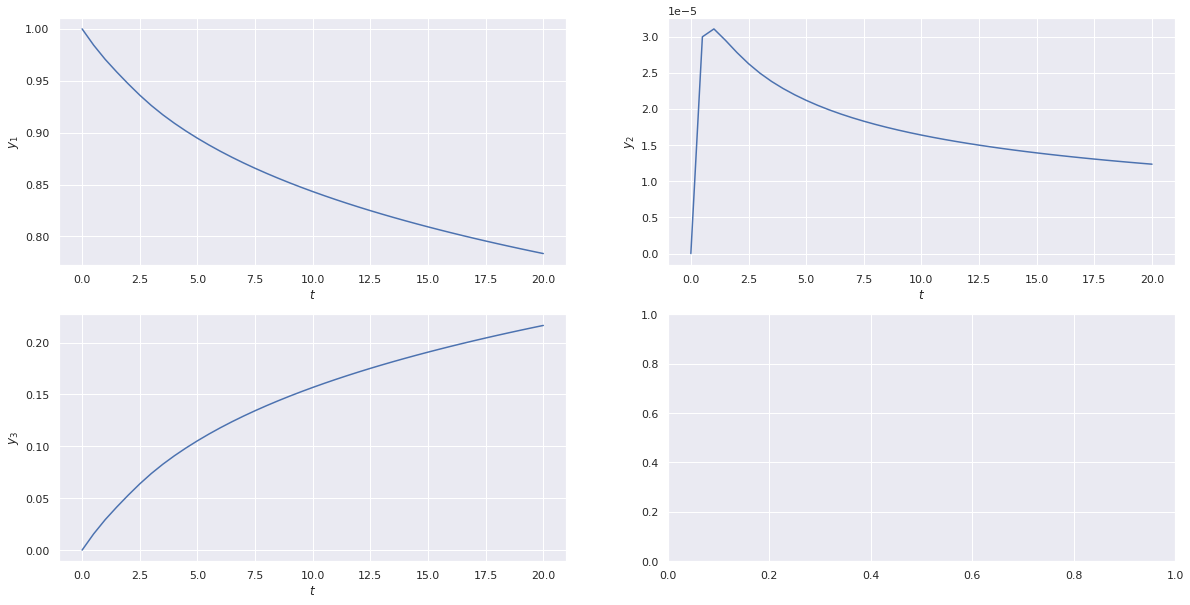

In [ ]:
make_plots(FDN4, 20, 0.5)

Аналогично методу ФДН 2 порядка, методы 3 и 4 порядков также не показали приувеличении шага осцилляций в решении $y_2$.

Теперь построим графики решений на отрезках $T_k = 100, 1000, ..., 10^{11}$.

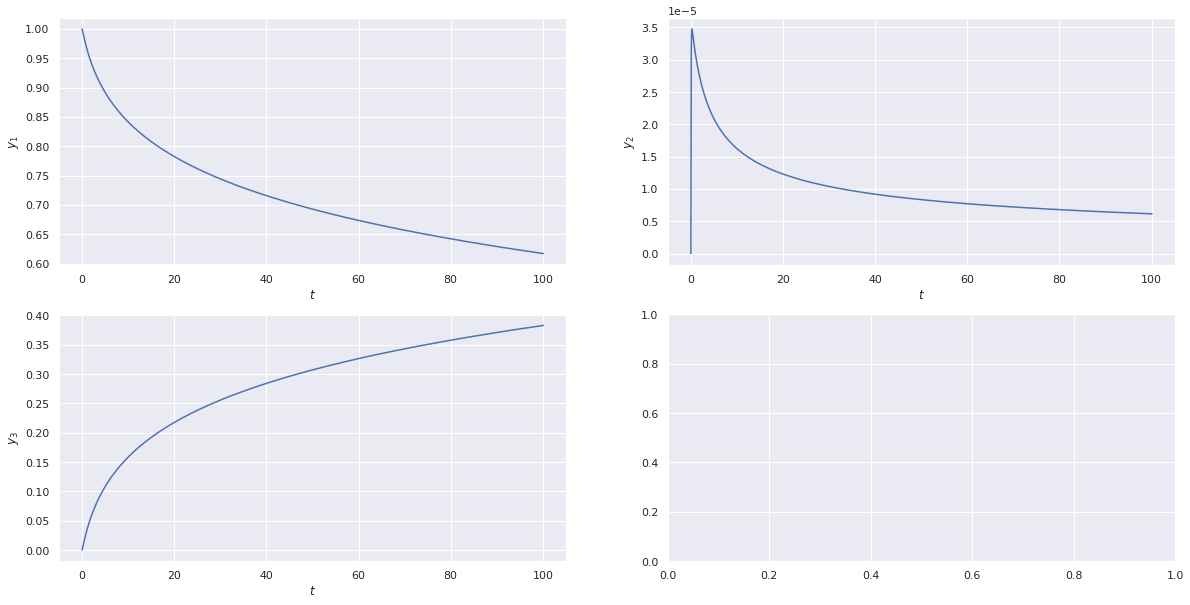

In [ ]:
make_plots(FDN4, 100, 0.1)

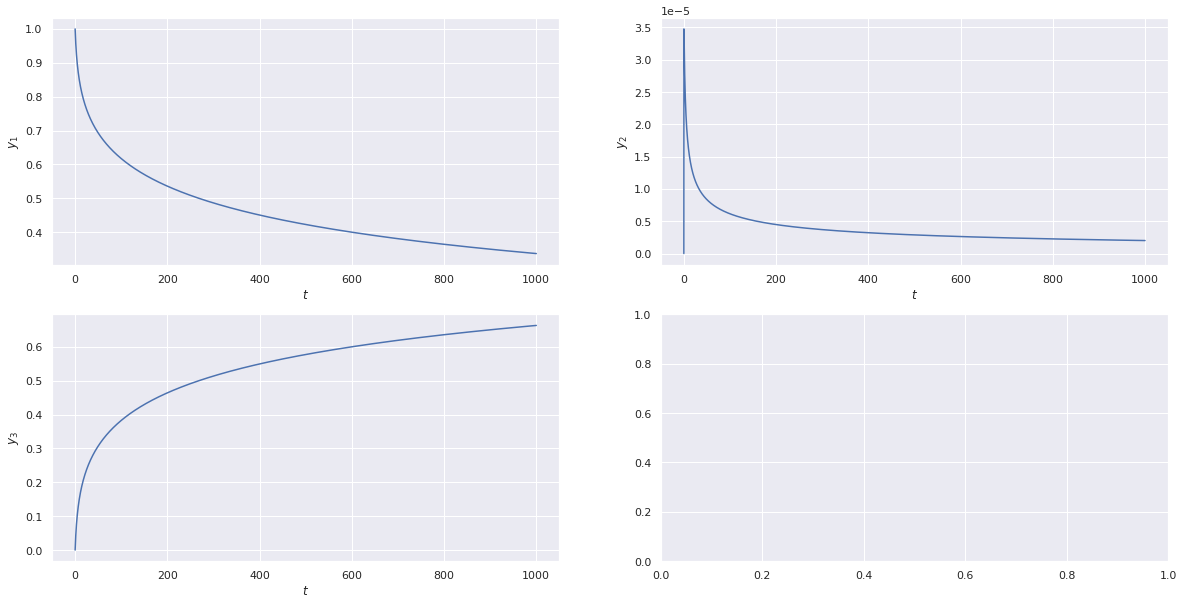

In [ ]:
make_plots(FDN4, 10**(3), 0.1)

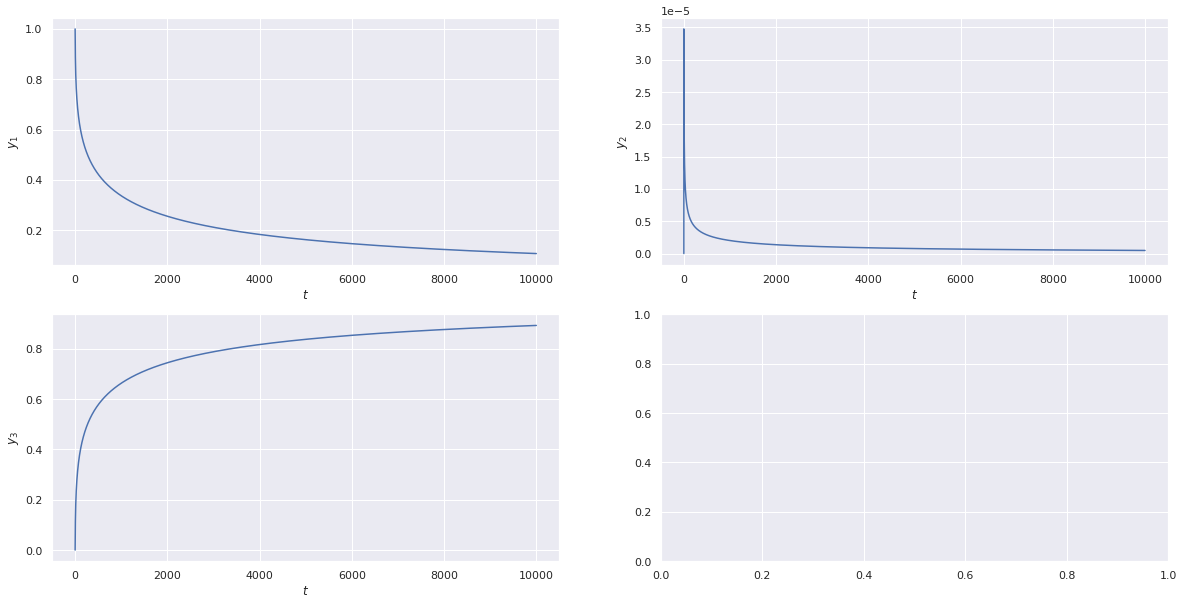

In [ ]:
make_plots(FDN4, 10**(4), 0.1)

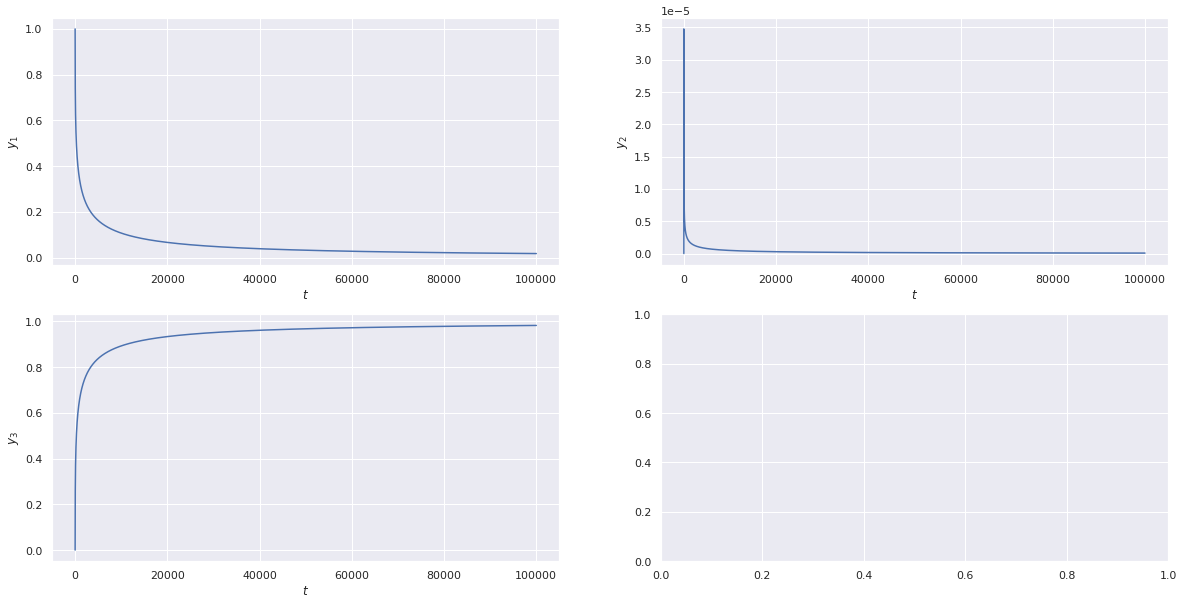

In [ ]:
make_plots(FDN4, 10**(5), 0.1)

График для отрезка $T_k = 10^5$ строился 3.5 минуты -- значит, вероятнее всего, следующие графики будут занимать в построении больше и больше времени, то есть до конца диапазона с таким же шагом дойти быстро не удастся. Поэтому для $T_k = 10^6$ попробуем построить также график методом ФДН 4 порядка аппроксимации с шагом $h = 0.5$. Но увеличение шага ведет к потери устойчивости.

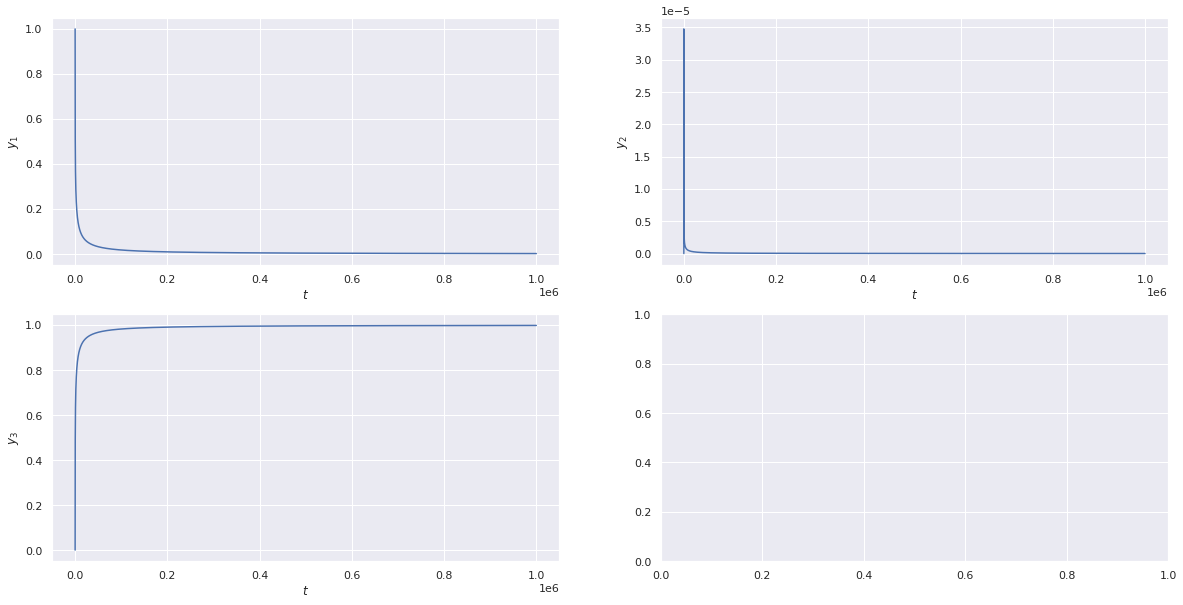

In [ ]:
make_plots(FDN4, 10**(6), 0.1)

Графики выше строились 40 минут -- гипотеза подтвердилась, поэтому увеличим шаг.

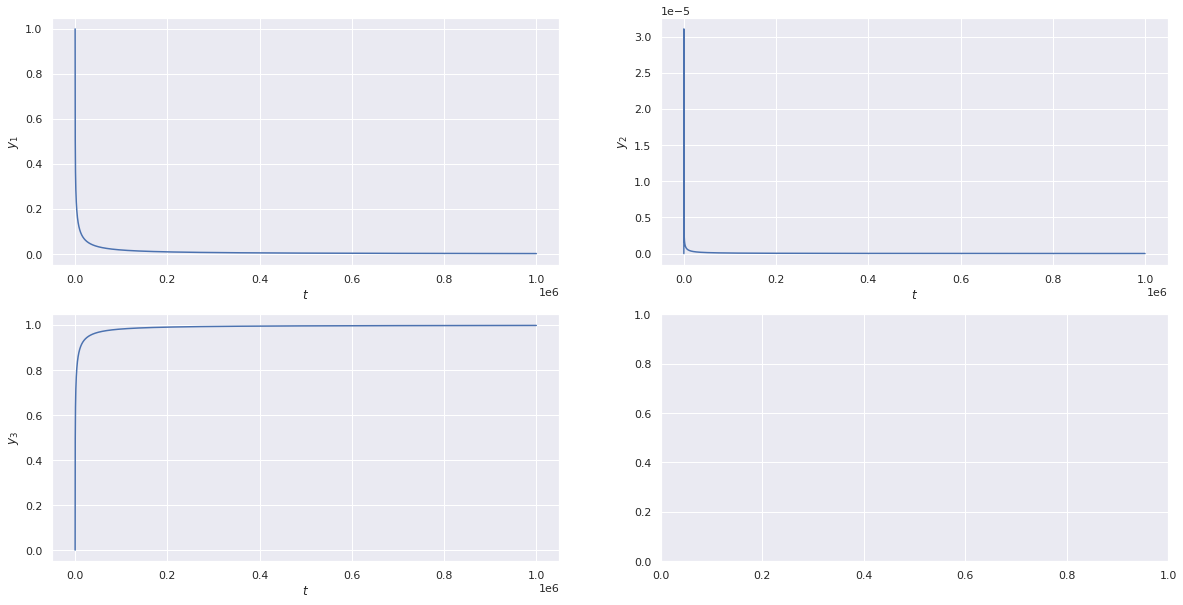

In [ ]:
make_plots(FDN4, 10**(6), 0.5)

Успех -- построение графиков с шагом $h = 0.5$ заняло всего 6 минут, однако дальше шаг вновь придется увеличить. Причем шаг $h = 1$ тоже сильно нагроужает компьютер, так что, начиная с $T_k = 10^8$, ограничимся шагом $h = 10$.

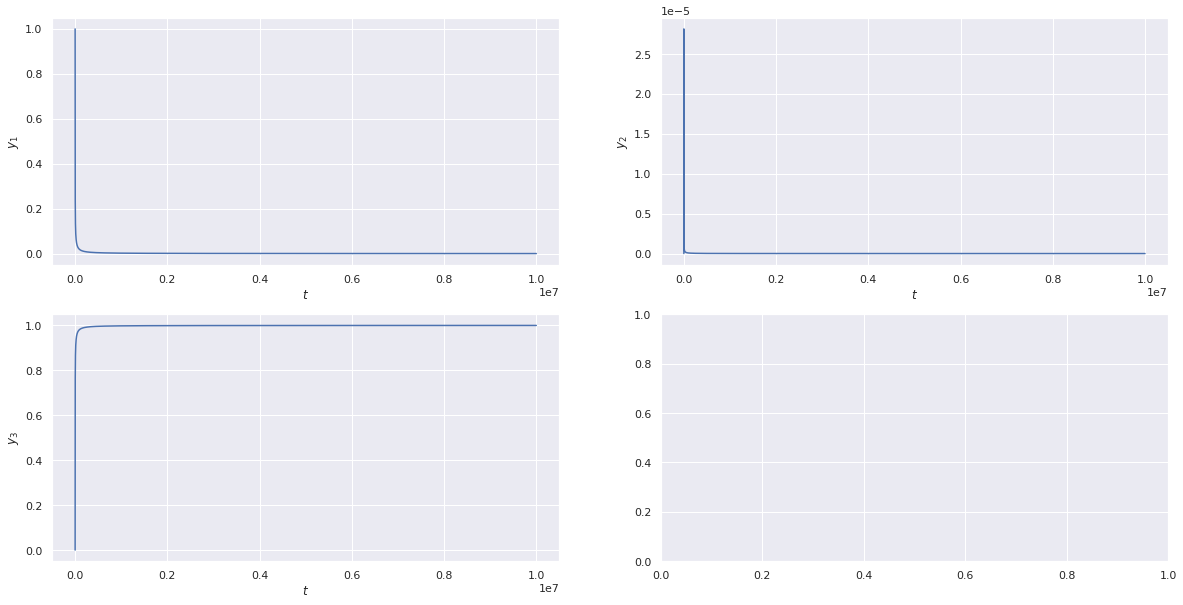

In [ ]:
make_plots(FDN4, 10**(7), 1)

С решением $y_2$ произошли странные изменения -- появились решения меньше нуля, причем такие, которые должны были возникнуть на предыдущем отрезке. 

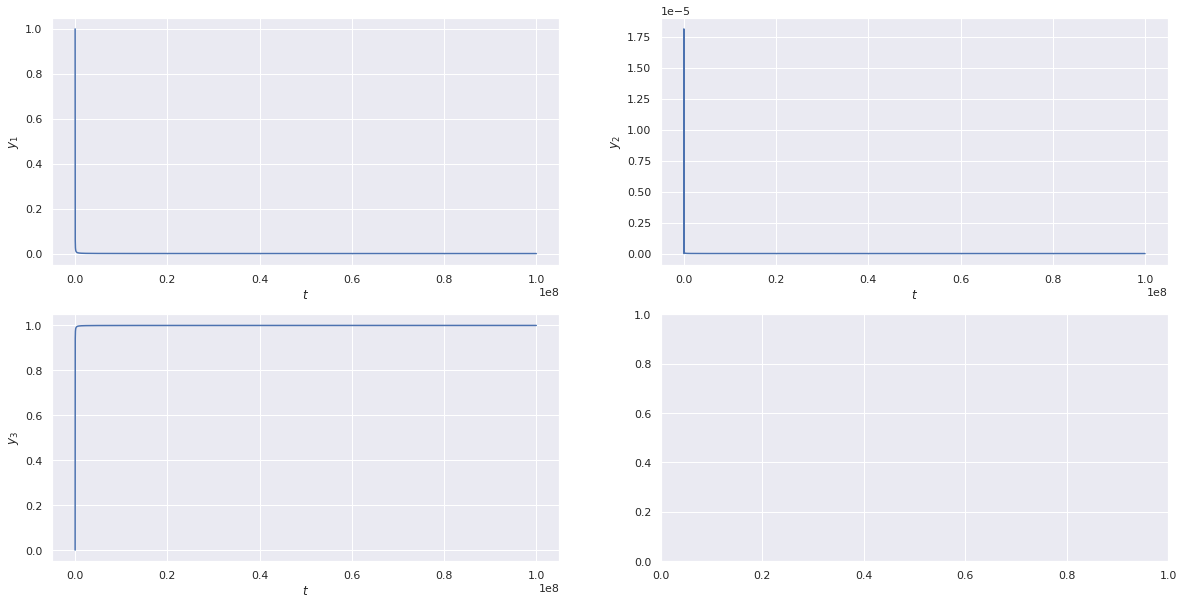

In [ ]:
make_plots(FDN4, 10**(8), 10)

Решения стали выглядеть идентично при разных интервалах интегрирования, поэтому, чтобы также не жертвовать много времени на построение еще трех графиков, ограничимся теми, что уже построены. Вообще, решения начали стремиться к константам ($y_1 → 0$, $y_2 → 0$, $y_3 → 0$) еще на отрезке $T_k = 5$, что куда более ярко проявилось на больших отрезках интегрирования, значит, долго строить графики решений на последующих отрезках не имеет большого смысла.

Поскольку на больших отрезках времени вычисления производятся долго и требуют увеличения шага (= ухудшения устойчивости), то можно сделать замену, типичную для уравнений химической кинетики:

$$τ = ln t$$
$$y(t) = y(e^{τ})$$
$$\dot{y} = \dot{y} e^{- τ}$$


Поскольку имеем систему ДУ с нелинейными уравнениями, классическое решение не понятно, как искать. В качестве эталонного решения возьмем решение методом ФДН 4 порядка аппроксимации и рассмотрим невязки остальных методов с ним.

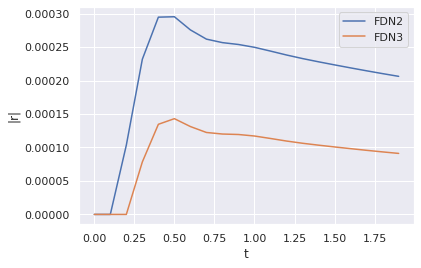

In [ ]:
methods_dict = {'FDN2': FDN2, 'FDN3': FDN3, 'FDN4': FDN4}
make_plots_nevyazka(methods_dict, 20, 0.1)

На отрезке $T_k = 20$ с первоначальным шагом $h = 0.1$ заметны расхождения ФДН 2 и 3 порядка аппроксимации, но для лучшей репрезентации рассмотрим $T_k = 1000$.

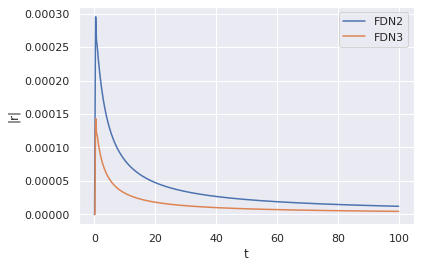

In [ ]:
methods_dict = {'FDN2': FDN2, 'FDN3': FDN3, 'FDN4': FDN4}
make_plots_nevyazka(methods_dict, 1000, 0.1)

Итак, убедились, что невязка ФДН 3 порядка относительно заданного "эталонного решения" по сравнению с невязкой ФДН 2 порядка значительно меньше. Теперь рассмотрим также остальные методы, но шаг для уменьшения времени работы кода увеличим до $h = 1$.

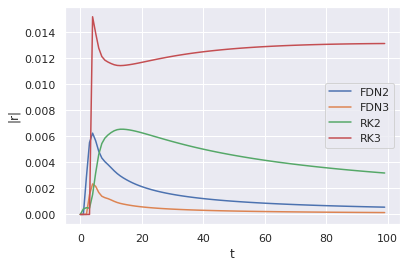

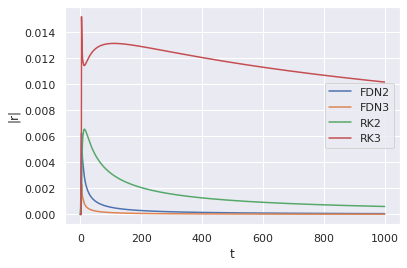

In [ ]:
methods_dict = {'FDN2': FDN2, 'FDN3': FDN3, 'RK2': RK2, 'RK3': RK3, 'FDN4': FDN4}
make_plots_nevyazka(methods_dict, 100, 1)
make_plots_nevyazka(methods_dict, 1000, 1)

Видим, что из всех используемых методов наиболее близок к решению метод ФДН 3 порядка, затем -- ФДН 2 порядка, Рунге-Кутты 2 порядка и Рунге-Кутты 3 порядка (по увеличению невязки).

Перейдем к построению функций устойчивости и ее исследованию. $z = h λ$, где $λ$ -- норма матрицы Якоби.

Для ФДН 2 порядка:

$$z (R) = \dfrac{3}{2} - \dfrac{2}{R} + \dfrac{1}{2 R^2}$$

Для ФДН 3 порядка:

$$z (R) = \dfrac{\dfrac{11}{6} R^3 - 3 R^2 + \dfrac{3}{2} R - \dfrac{1}{3}}{R^3}$$

Для ФДН 4 порядка:

$$z (R) = \dfrac{\dfrac{25}{12} R^4 - 4 R^3 + 3 R^2 - \dfrac{4}{3} R + \dfrac{1}{4}}{R^4}$$

Граница области устойчивости $|R(z)| = 1$, как известно, определяется выражением $|R| = e^{i \phi}$. Область слева от границы полученной фигуры (при положительном обходе) -- область устойчивости.

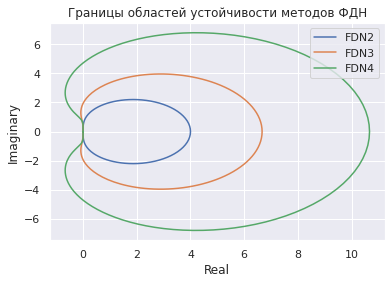

In [ ]:
phi = np.array([complex(0,np.pi * i) for i in np.arange(0,2,0.01)])
R = np.exp(phi)
border = [3/2 - 2/R + 1/(2*R**2), (11/6*R**3 - 3*R**2 + 3/2*R - 1/3)/R**3, (25/12 * R**4 - 4 * R**3 + 3 * R**2 - 4/3 * R + 1/4)/R**4]
for i in range(len(border)):
    plt.plot(border[i].real, border[i].imag, label=f'FDN{i+2}')
    plt.title('Границы областей устойчивости методов ФДН')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend()
plt.show()

А-устойчивым методом из всех, изображенных выше, является лишь ФДН 2 порядка аппроксимации, поскольку только его область устойчивости находится целиком в правой полуплоскости косплексной плоскости. 

Теперь проанализируем устойчивость методов Рунге-Кутты:

$$R(z) = \dfrac{det(E - zA + z e b^T)}{det(E - zA)}$$

Сперва рассмотрим метод Рунге-Кутты 2 порядка, на изображении белым цветом обозначена область абсолютной устойчивости.

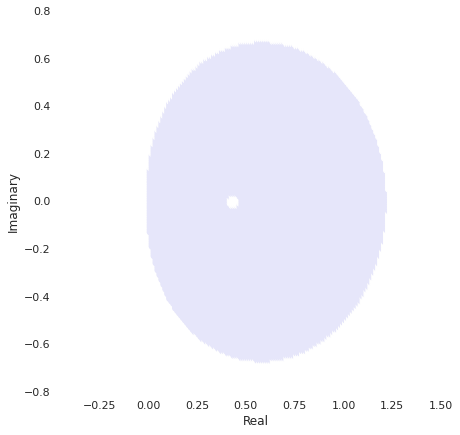

In [ ]:
mA = np.array([[(2 + math.sqrt(2)) / 2, 0], [-math.sqrt(2), (2 + math.sqrt(2)) / 2]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [], []
fig = plt.figure(figsize = (7, 7))
x, y, c = [], [], []
for i in range(-100, 400):
    for j in range(-250, 250):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(mE - z*mA + z*mB)/np.linalg.det(mE - z*mA))
        x.append(i / 100)
        y.append(j / 100)
        if (R > 1):
            c.append("lavender")
        else:
            c.append("white")

plt.scatter(x, y, color = c)
plt.xlim(-0.45, 1.55)
plt.ylim(-0.8, 0.8)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

Метод Рунге-Кутты 2 порядка аппроксимации является А-устойчивым (область устйчивости целиком лежит в правой полуплоскости).

Теперь рассмотрим устойчивость метода Рунге-Кутты 3 порядка аппроксимации.

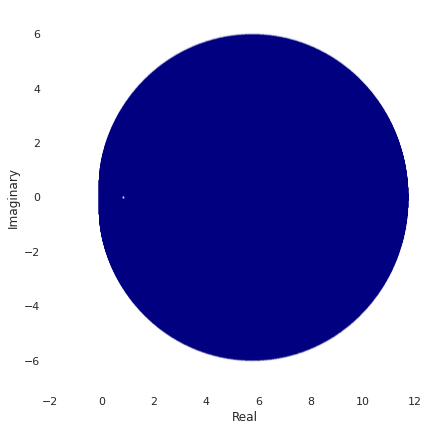

In [ ]:
mA = np.array([[(3 + math.sqrt(3)) / 6, 0], [(- 2*math.sqrt(3))/6, (3 + math.sqrt(3)) / 6]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [], []
fig = plt.figure(figsize = (7, 7))
x, y, c = [], [], []
for i in range(-2000, 2000):
    for j in range(-800, 800):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(mE - z*mA + z*mB) / np.linalg.det(mE - z*mA))
        x.append(i / 100)
        y.append(j / 100)
        if (R > 1):
            c.append("navy")
        else:
            c.append("white")

plt.scatter(x, y, color = c)
plt.xlim(-2, 13)
plt.ylim(-7, 7)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

Приблизим картинку, чтобы лучше увидеть область абсолютной устойчивости.

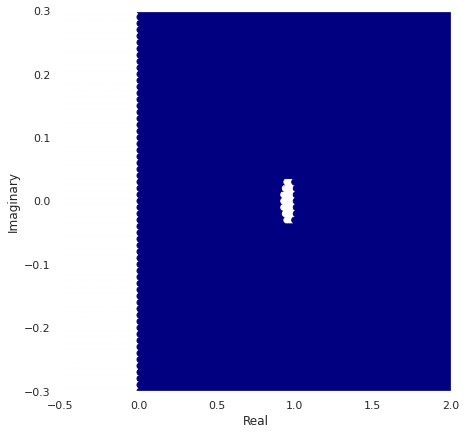

In [ ]:
mA = np.array([[(3 + math.sqrt(3)) / 6, 0], [(- 2*math.sqrt(3))/6, (3 + math.sqrt(3)) / 6]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [], []
fig = plt.figure(figsize = (7, 7))
x, y, c = [], [], []
for i in range(-900, 900):
    for j in range(-400, 400):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(mE - z*mA + z*mB) / np.linalg.det(mE - z*mA))
        x.append(i / 100)
        y.append(j / 100)
        if (R > 1):
            c.append("navy")
        else:
            c.append("white")

plt.scatter(x, y, color = c)
plt.xlim(-0.5, 2)
plt.ylim(-0.3, 0.3)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

Метод Рунге-Кутты 3 порядка оказался А-устойчивым.

Проверим А-устойчивые методы на наличие (или отсутствие) L-устойчивости, которая по определению есть стремление к нулю $|R(z)|$ при $Re(z) \rightarrow - ∞$.

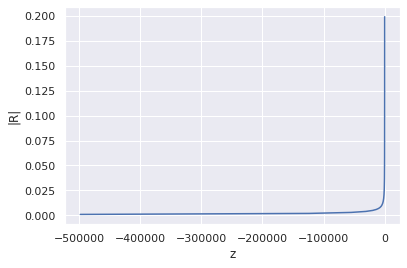

In [ ]:
N = 200
z, R, h = [0] * N, [0] * N, 0.001
for i in range(1, N):
    R[i] = i * h
    z[i] = ((3 / 2 * R[i] ** (2) - 2 * R[i] + 1 / 2) / R[i] ** (2))
z = z[1:]
R = R[1:]
plt.plot(-np.array(z), R)
plt.xlabel("z")
plt.ylabel("|R|")
plt.show()

Метод ФДН 2 порядка является L-устойчивым, поскольку при $Re(z) \rightarrow - ∞$ выполнено, что $|R(z)| → 0$.

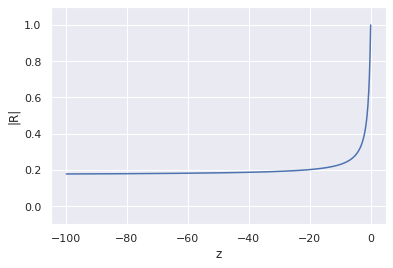

In [ ]:
mA = np.array([[(2 + math.sqrt(2)) / 2, 0], [-math.sqrt(2), (2 + math.sqrt(2)) / 2]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [],[]
for i in range(0, 1000):
    z.append(-i / 10)
    R.append(abs(np.linalg.det(mE - z[i] * mA + z[i] * mB) / np.linalg.det(mE - z[i] * mA)))

plt.plot(z, R)
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("|R|")
plt.show()

Метод Рунге-Кутты 2 порядка не является L-устойчивым.

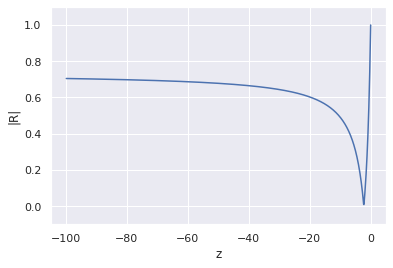

In [4]:
mA = np.array([[(3 + math.sqrt(3)) / 6, 0], [-2*math.sqrt(3)/6, (3 + math.sqrt(3)) / 6]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [],[]
for i in range(0, 1000):
    z.append(-i / 10)
    R.append(abs(np.linalg.det(mE - z[i] * mA + z[i] * mB) / np.linalg.det(mE - z[i] * mA)))

plt.plot(z, R)
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("|R|")
plt.show()

Метод Рунге-Кутты 3 порядка так же не является L-устойчивым.

**Общие выводы**

1. На меньшем отрезке интегрирования при вариации шага на примере методов Рунге-Кутты было заметно нарушение устойчивости -- большой шаг приводил к осцилляции решения $y_2$, в то время как при решении методами ФДН таких осцилляций не было, значит, методы ФДН более устойчивы по отношению к изменению шага.
2. На отрезках интегрирования $T_k$, начиная с $T_k = 100$, поведение решений было одинаковым, за исключением решения $y_2$, которое на отрезке $T_k = 10^7$ при шаге $h = 1$ приобрело значения меньше нуля, что при большем шаге не проявилось на следующем отрезке и при меньшем шаге не было заметно на предыдущем отрезке. 
3. Если в качестве "эталонного" решения взять аппроксимацию методом ФДН 4 порядка, то ближе всего к нему решение методом ФДН 3 порядка. После в порядке убывания близости к эталонному решению расположены методы ФДН 2 порядка, Рунге-Кутты 2 порядка и Рунге-Кутты 3 порядка.
4. А-устойчивыми являются методы ФДН 2 порядка, Рунге-Кутты 2 и 3 порядка.
5. Метод ФДН 2 порядка также является L-устойчивым, методы Рунге-Кутты 2 и 3 порядка такой устойчивостью не обладают.


**Задача 3.4**

